## Вариант 21 Хайретдинов Тимур Сергеевич 382008-1
# Уравнение Кеплера
Уравнение Кеплера для вычисления орбиты имеет вид 𝑀=𝐸−𝜀sin𝐸,

где 𝑀 – средняя аномалия, 𝐸 – эксцентрическая аномалия, 𝜀 – эксцентриситет орбиты. Пусть 𝑀=24.851090 , 𝜀=0.1.

Для примера возьмем планету Марс, т.к. примерно равные эксцентриситеты(используется только для простоения орбиты).

1) Построим орбиту, используя метод последовательных приближений найдем E.

2) Найдем E, используя scipy.optimize.brentq.

3) Вычислим $E$ с помощью формулы

де $J_m(x)$ – функция Бесселя $1$-го рода порядка $m$. Найдем $E$ по предыдущей формуле, используя равенство$$
      J_m(m\varepsilon) = \sum_{n=0}^{\infty} \frac{(-1)^n (m\varepsilon/2)^{2n+m}}{n!(m+n)!}.
    $$

# Шаг 1
## Выведем уравнения кеплера 

### Эллипс-сплюснутая на велечину окружность
$ \sqrt{(1-e^2)}$ , где $e$ - эксцентриситет.
### Площадь эллипса равна: $$ S = \pi  a^2   \sqrt{(1-e^2)}$$ 
Где $ a $ - большая полуось 

### Согласно второму закону Кеплера, который гласит, что площадь, заметаемая радиус-вектором небесного тела пропорциональна времени, можно написать
$ S(t) = \pi a^2 \sqrt{1-e^2} (\frac{(t-t0)}{T})$ 

где T — период обращения, t — текущее время, t0 — момент времени прохождения перигелия (ближайшей к Солнцу точки орбиты).

Найдем теперь зависимость этой площади от положения небесного тела на орбите, то есть от величины радиус-вектора r и истинной аномалии — угла между перигелием и небесным телом, если смотреть с Солнца.

Для этого введем дополнительную переменную — эксцентрическую аномалию E.
Направим ось x от Солнца (начала координат), которое находится в одном из фокусов эллипса, в сторону перигелия по линии апсид (прямой, соединяющей перицентр с апоцентром).
Создадим также вспомогательную окружность с радиусом, равным большой полуоси эллипса.
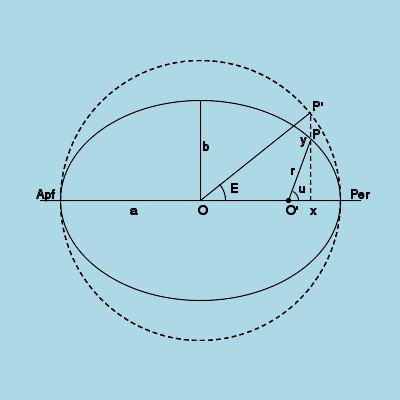


### Абсцисса небесного тела в точке P будет равна: 
$$ x = a cosE - ae $$
### Ордината будет, соответственно, равна
$$ y = \sqrt{1-e^2} a sinE $$
### Таким образом: 
$$ x = r cos(\varphi)  = a(cosE - e)$$
$$ y = r sin(\varphi) = a \sqrt{1-e^2} sinE $$

Для вычисления площади S рассмотрим вспомогательные фигуры: Сектор окружности
$P'-O-Per :$
$$ S1 =\frac{a^2 E}{2} $$

Сектор эллипса $P-O-Per$
$$ S2 = \sqrt{1-e^2} S1 $$

Треугольник $ O-O'-P$
$$ S3 = \frac{1}{2} y a e = \frac{1}{2} a^2 e \sqrt{1-e^2} sinE $$

Сектор $P-O'-Per$
$$S=S2-S3$$
### Отсюда площадь S равна:
$$ S(t) = \frac {1}{2} a^2 \sqrt{1-e^2}(E-e sinE) $$
### Сравнивая это выражение с выведенным ранее из второго закона Кеплера, получаем:
$$ E(t)-e sinE(t) = M(t) $$
Где $M(t) = 2 \pi \frac {t-t0}{T} $
### Это и есть уравнение Кеплера


#### Источник : https://habr.com/ru/post/209106/#:~:text=Согласно%20второму%20закону%20Кеплера%2C%20который,(ближайшей%20к%20Солнцу%20точки%20орбиты)

# Шаг 2
## Построим орбиту, используя метод последовательных приближений найдем E.
## Для примера возьмем планету Марс, т.к. примерно равные эксцентриситеты.
#### Метод последовательных приближений (метод итераций). Метод итерации — численный метод решения математических задач, используемый для приближённого решения алгебраических уравнений и систем. Суть метода заключается в нахождении по приближённому значению величины следующего приближения (являющегося более точным).

Большая полуось марса = 149600000*1.52

In [ ]:
from numpy import*
from matpotlib.pyplot import*
%matpotlib inline
M=24.851090
e = 0.1
N=360
def X(E):
    rez = a*cos(E)-e
    return rez
def Y(E):
    rez = a*sin(E)*sqrt(1-e**0.5)
    return rez
E = [i for i in arange(0,N,1)]
X=array([X(j) for j in E])
Y=array([Y(j) for j in E])
figure()
figure()
title("Орбита Марса")
axis('equal')
plot (X, Y, ".")
grid(True)
pass